In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import numpy as np
import seaborn as sns

df = pd.concat(pd.read_excel("Dados/202010.xlsx", sheet_name=None), ignore_index=True)
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 4" : "Lançamento", 'Unnamed: 10' : 'Nr Litros', "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.dropna(axis="columns")
pd.set_option('display.max_rows', df.shape[0]+1)
df = df.drop(['EQAL', 'Exerc.', 'Exerc..1', 'Liquidação', 'Tipo.1', 'Serie', 'Valor Ajustado', 'Nr.  Lcto Fitcard', 'Lançamento  Nr. Ordem\nAbast.'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,01/10/2020,79468,BCD-6529,Abast,ETANOL,45.959,132.83
1,01/10/2020,79438,ASZ-7061,Abast,GASOLINA,9.930,41.61
2,01/10/2020,79505,AHR-3194,Abast,GASOLINA,30.642,131.46
3,01/10/2020,79481,ATU-6517,Abast,ETANOL,31.730,91.72
4,01/10/2020,78040,AEO-9326,Abast,DIESEL,100.000,329.01
5,01/10/2020,79435,ASZ-6991,Abast,GASOLINA,7.749,33.78
6,02/10/2020,79467,BCD-6528,Abast,ETANOL,43.463,123.01
7,02/10/2020,79463,BCD-6524,Abast,ETANOL,40.810,117.95
8,02/10/2020,79444,ATL-9834,Abast,ETANOL,46.940,135.67
9,02/10/2020,79445,ATL-9829,Abast,ETANOL,47.840,152.62


In [2]:
from pandas_profiling import ProfileReport

profile = df.profile_report(
      sort='ascending',
      vars={
          'num':{'low_categorical_threshold': 0},
          'cat':{
            'length':True,
            'unicode':False,
            'n_obs': 5,
          }
      }
)

profile.set_variable('variables.descriptions',
    {
      'files': 'Files in the filesystem',
      'datec': 'Creation date',
      'datem': 'Modification date',
    }
)

profile.to_file("Pandas_Profiling/201905-PP.html")

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [3]:
from pivottablejs import pivot_ui

pivot_ui(df, outfile_path='PivottableJS/201905-PJS.html')

In [4]:
df["Nr Litros"].mean()
#df["Valor Abast."].std()
#df["Valor Ajustado"].std()

47.872301818181825

In [5]:
df.sort_values(by="Nr Litros")

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
217,26/10/2020,93018,ATW-9367,Abast,GASOLINA,6.021,26.44
184,22/10/2020,93018,ATW-9367,Abast,GASOLINA,6.061,26.01
179,21/10/2020,93011,ATW-9412,Abast,GASOLINA,6.150,26.39
218,26/10/2020,93009,ATW-9378,Abast,GASOLINA,6.401,28.11
135,16/10/2020,93009,ATW-9378,Abast,GASOLINA,6.520,27.98
160,19/10/2020,93018,ATW-9367,Abast,GASOLINA,6.570,28.17
25,05/10/2020,93014,ATW-9372,Abast,GASOLINA,6.809,29.22
118,14/10/2020,93018,ATW-9367,Abast,GASOLINA,6.851,29.40
186,22/10/2020,93014,ATW-9372,Abast,GASOLINA,6.870,29.48
273,31/10/2020,93014,ATW-9372,Abast,GASOLINA,6.891,30.26


In [6]:
df[df["Nr Litros"] > df["Nr Litros"].mean()].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
237,27/10/2020,79474,EQU-4283,Abast,DIESEL,250.021,847.58
30,05/10/2020,79474,EQU-4283,Abast,DIESEL,250.003,822.52
222,26/10/2020,31093,AZL-3509,Abast,DIESEL,220.661,748.05
84,09/10/2020,31093,AZL-3509,Abast,DIESEL,210.260,712.79
18,03/10/2020,31093,AZL-3509,Abast,DIESEL,206.000,698.45
21,05/10/2020,79479,BDL0C63,Abast,DIESEL,186.251,631.40
80,09/10/2020,31102,AZR-9543,Abast,DIESEL,170.821,562.01
92,13/10/2020,79476,BDI4E74,Abast,DIESEL,170.790,579.02
263,29/10/2020,79479,BDL0C63,Abast,DIESEL,151.720,514.34
136,16/10/2020,41019,EQU-4119,Abast,DIESEL,132.470,457.03


In [7]:
df[(df["Nr Litros"] > df["Nr Litros"].mean()) & (df["Produto"] == "GASOLINA")].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
191,22/10/2020,79421,AJN-3792,Abast,GASOLINA,59.730,256.25
26,05/10/2020,92046,ALE-6725,Abast,GASOLINA,57.841,240.05
66,08/10/2020,79421,AJN-3792,Abast,GASOLINA,52.318,217.13
245,28/10/2020,92046,ALE-6725,Abast,GASOLINA,50.820,215.99
134,16/10/2020,79444,ATL-9834,Abast,GASOLINA,50.470,214.01
151,19/10/2020,79441,ATM-6449,Abast,GASOLINA,50.448,214.41
137,16/10/2020,92046,ALE-6725,Abast,GASOLINA,50.180,213.27
198,22/10/2020,79470,BCD-6851,Abast,GASOLINA,49.310,226.84
250,28/10/2020,79422,AJN-3794,Abast,GASOLINA,48.670,213.67


In [8]:
dfg = df[df["Produto"] == 'GASOLINA']
dfe = df[df["Produto"] == 'ETANOL']
dfd = df[df["Produto"] == 'DIESEL']

In [9]:
# Check if there is a vehicle that uses 'ETANOL' and 'DIESEL'
dfc = dfd.merge(dfe['Placa'], left_on='Placa', right_on='Placa')
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dft = dfc.groupby(["Placa", "Produto"]).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
dft

,,Valor Abast.,Nr Litros
Placa,Produto,,


In [10]:
# Check if there is a vehicle that uses 'GASOLINA' and 'DIESEL'
dfc = dfd.merge(dfg['Placa'], left_on='Placa', right_on='Placa')
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dft = dfc.groupby(["Placa", "Produto"]).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})

In [11]:
# Check if there is vehicles that use 'GASOLINA' and 'ETANOL'
dfg = df[df["Produto"] == 'GASOLINA']
dfe = df[df["Produto"] == 'ETANOL']
dfd = df[df["Produto"] == 'DIESEL']
dfc = dfg.merge(dfe['Placa'], left_on='Placa', right_on='Placa')
dfc = dfc.drop_duplicates(subset=['Placa', 'Nr Litros'])
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dfc = dfc.drop_duplicates(subset=['Placa', 'Nr Litros'])
dft = dfc.groupby(['Placa', 'Produto']).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
dft['Valor Litro'] = dft['Valor Abast.'] / dft['Nr Litros']
dft['Valor Litro'] = dft['Valor Litro'].round(2)
dft = dft.reset_index()
dft

,Placa,Produto,Valor Abast.,Nr Litros,Valor Litro
0,ATL-9834,ETANOL,287.87,96.190,2.99
1,ATL-9834,GASOLINA,214.01,50.470,4.24
2,ATM-6449,ETANOL,296.92,101.313,2.93
3,ATM-6449,GASOLINA,214.41,50.448,4.25
4,BCD-6851,ETANOL,152.65,51.051,2.99
5,BCD-6851,GASOLINA,226.84,49.310,4.60


[Text(0.5, 1.0, 'Placa x Número de Litros 05/2019'),
 Text(0.5, 0, 'Placa'),
 Text(0, 0.5, 'Número de Litros')]

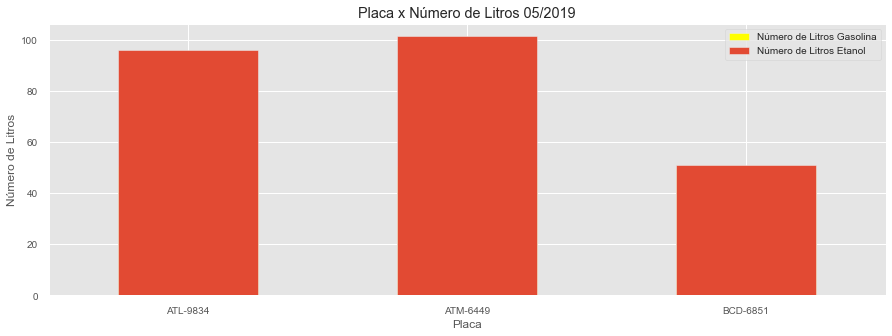

In [12]:
#set ggplot style
plt.style.use('ggplot')

#create the figure and the axes
fig, ax = plt.subplots()
dftpg = dft[dft['Produto'] == 'GASOLINA']
dftpe = dft[dft['Produto'] == 'ETANOL']

#plot the data and get the average
dftpg.plot(kind='bar', y = "Nr Litros", x ="Placa", rot = 0, ax=ax, figsize=(15, 5), color=("yellow"))
dftpe.plot(kind='bar', y = "Nr Litros", x ="Placa", rot = 0, ax=ax, figsize=(15, 5))

#set limits and labels
#avggas = dftpg["Valor Litro"].mean()
#ax.axvline(avggas, color='b', label='Média', linestyle='--', linewidth=1)
#avgeta = dftpg["Valor Litro"].mean()
#ax.axvline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
ax.legend(["Número de Litros Gasolina", "Número de Litros Etanol", "Valor por Litro Gasolina"])
ax.set(title='Placa x Número de Litros 05/2019', xlabel='Placa', ylabel='Número de Litros')

<AxesSubplot:xlabel='Placa'>

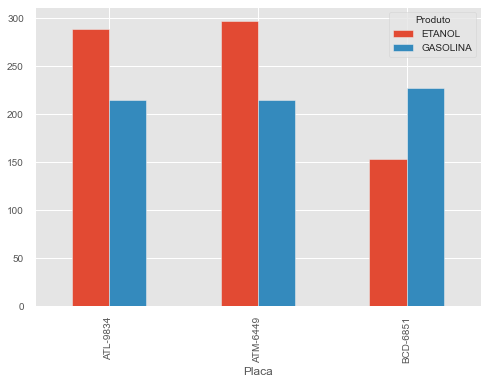

In [13]:
dft.groupby(['Placa', 'Produto'])['Valor Abast.'].mean().unstack().plot.bar()

<AxesSubplot:xlabel='Placa'>

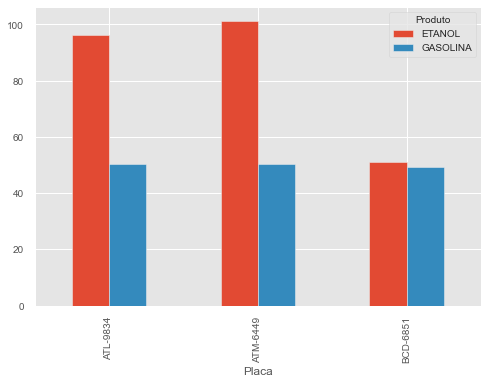

In [14]:
dft.groupby(['Placa', 'Produto'])['Nr Litros'].mean().unstack().plot.bar()

[Text(0.5, 1.0, 'Placa x Valor por Litro 05/2019'),
 Text(0.5, 0, 'Placa'),
 Text(0, 0.5, 'Valor por Litro')]

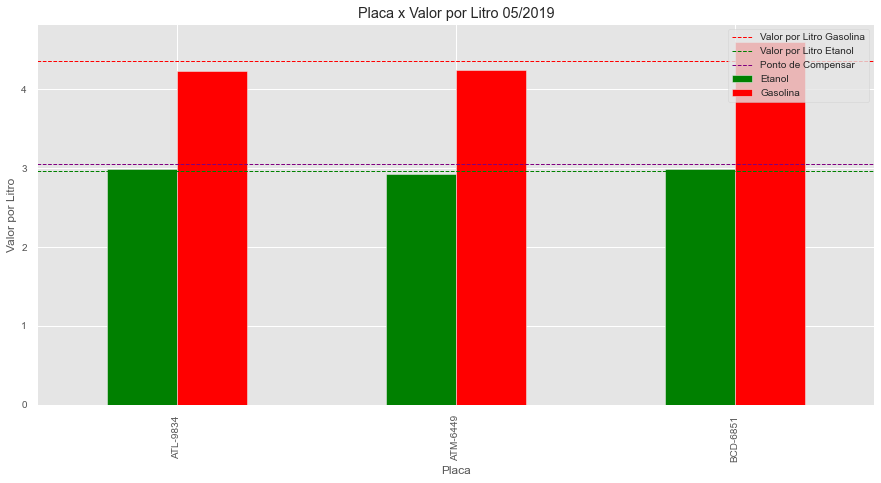

In [15]:
fig, ax = plt.subplots()
dft.groupby(['Placa', 'Produto'])['Valor Litro'].mean().unstack().plot(kind="bar", ax=ax, color=['g', 'r'],figsize=(15,7))

avggas = dftpg["Valor Litro"].mean()
ax.axhline(avggas, color='r', label='Média', linestyle='--', linewidth=1)
avgeta = dftpe["Valor Litro"].mean()
ax.axhline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
worthGas = avggas * 0.7
ax.axhline(worthGas, color='purple', label='Média', linestyle='--', linewidth=1)
ax.legend(["Valor por Litro Gasolina", "Valor por Litro Etanol", "Ponto de Compensar", 'Etanol', 'Gasolina'])
ax.set(title='Placa x Valor por Litro 05/2019', xlabel='Placa', ylabel='Valor por Litro')

[Text(0.5, 1.0, 'Placa x Valor por Litro 05/2019'),
 Text(0.5, 0, 'Placa'),
 Text(0, 0.5, 'Valor por Litro')]

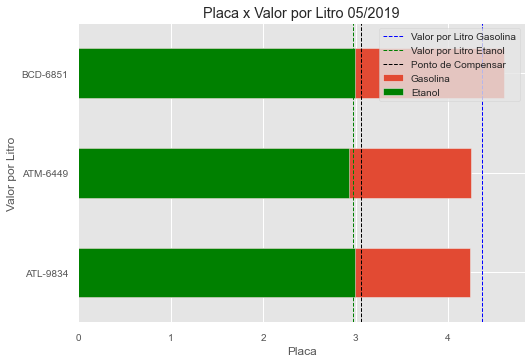

In [16]:
#set ggplot style
plt.style.use('ggplot')

#create the figure and the axes
fig, ax = plt.subplots()
dftpg = dft[dft['Produto'] == 'GASOLINA']
dftpe = dft[dft['Produto'] == 'ETANOL']

#plot the data and get the average
dftpg.plot(kind='barh', y = "Valor Litro", x ="Placa", rot = 0, ax=ax,)
dftpe.plot(kind='barh', y = "Valor Litro", x ="Placa", rot = 0, ax=ax, color='green')

#set limits and labels
avggas = dftpg["Valor Litro"].mean()
ax.axvline(avggas, color='b', label='Média', linestyle='--', linewidth=1)
avgeta = dftpe["Valor Litro"].mean()
ax.axvline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
worthGas = avggas * 0.7
ax.axvline(worthGas, color='black', label='Média', linestyle='--', linewidth=1)

ax.legend(["Valor por Litro Gasolina", "Valor por Litro Etanol", "Ponto de Compensar", 'Gasolina', 'Etanol'])
ax.set(title='Placa x Valor por Litro 05/2019', xlabel='Placa', ylabel='Valor por Litro')
#ax1.legend(["Valor por Litro Gasolina", "Número de Litros Etanol"])
#ax1.set(title='Placa x Número de Litros 05/2019 Etanol', xlabel='Placa', ylabel='Número de Litros')

In [17]:
df["Produto"].value_counts()

ETANOL      126
GASOLINA     92
DIESEL       57
Name: Produto, dtype: int64

In [18]:
avgeta = dftpe["Valor Litro"].mean()
avgeta

2.97

In [19]:
df["Produto"].value_counts(normalize=True)

ETANOL      0.458182
GASOLINA    0.334545
DIESEL      0.207273
Name: Produto, dtype: float64

<AxesSubplot:title={'center':'Nr Litros'}, ylabel='Frequency'>

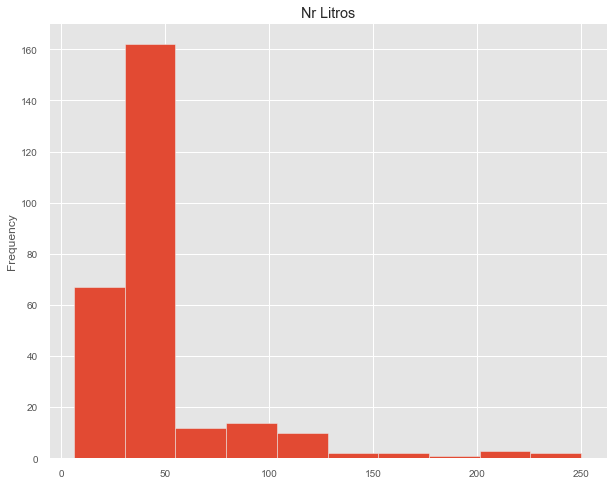

In [20]:
#Ploting
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
df["Nr Litros"].plot(kind='hist', title="Nr Litros")

<AxesSubplot:title={'center':'Valor Abastecido'}, ylabel='Frequency'>

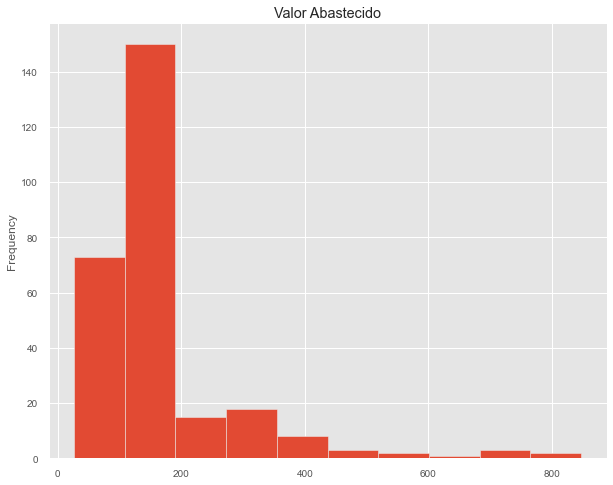

In [21]:
df["Valor Abast."].plot(kind='hist', title = "Valor Abastecido")

In [22]:
df["Nr Litros"].describe()

count    275.000000
mean      47.872302
std       38.173226
min        6.021000
25%       31.010000
50%       42.210000
75%       50.459000
max      250.021000
Name: Nr Litros, dtype: float64

<AxesSubplot:>

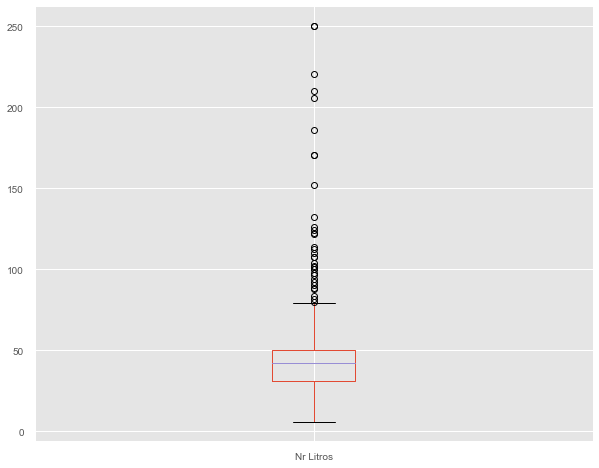

In [23]:
df["Nr Litros"].plot(kind="box")

<AxesSubplot:title={'center':'Valor Abast. x Nr Litros'}, xlabel='Valor Abast.', ylabel='Nr Litros'>

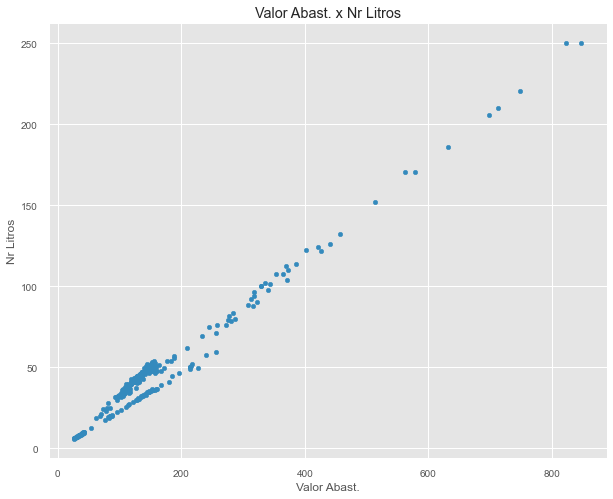

In [24]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

<AxesSubplot:title={'center':'Nr Litros'}, xlabel='Produto'>

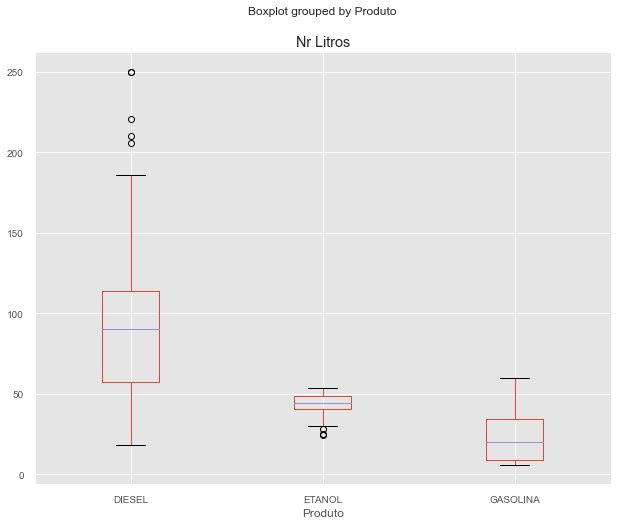

In [25]:
df.boxplot(column="Nr Litros", by="Produto")

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Data'>

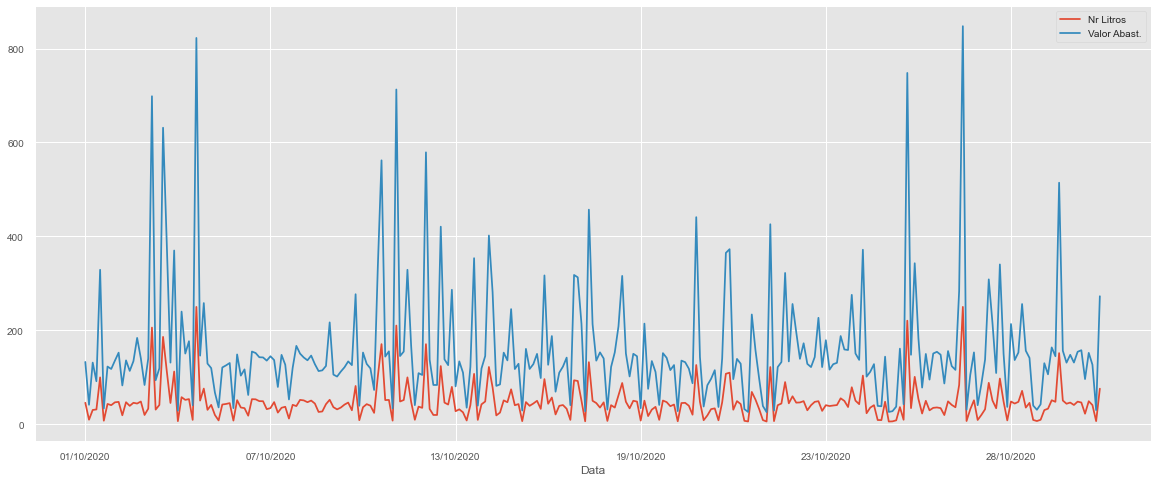

In [26]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

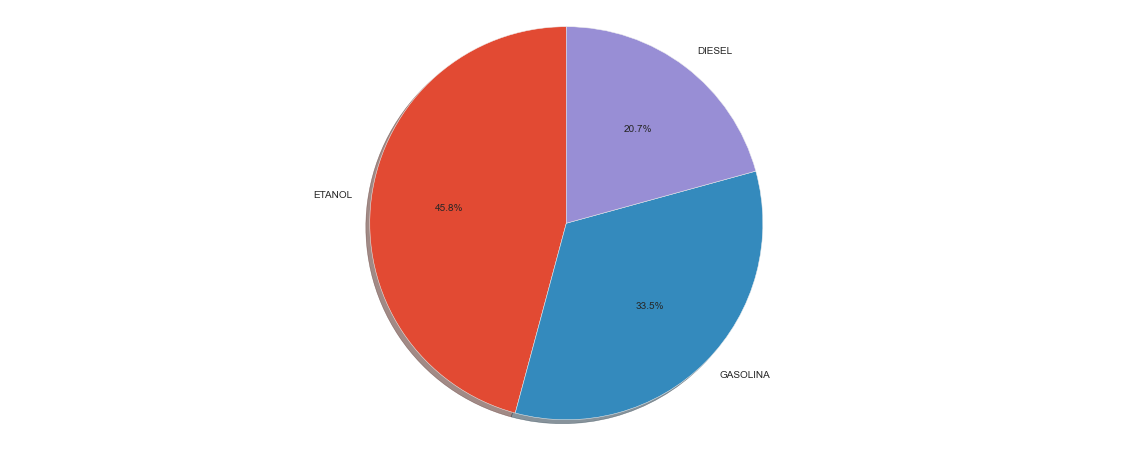

In [27]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

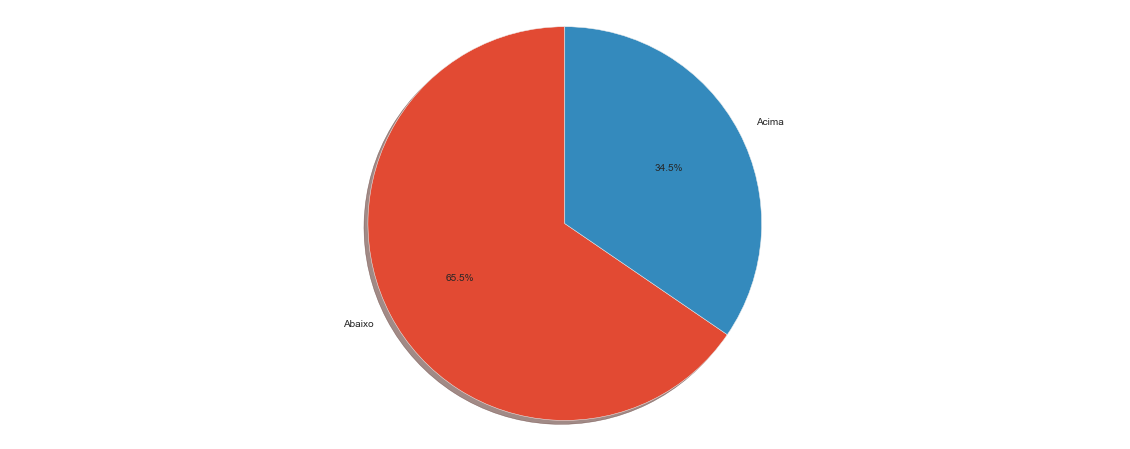

In [28]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

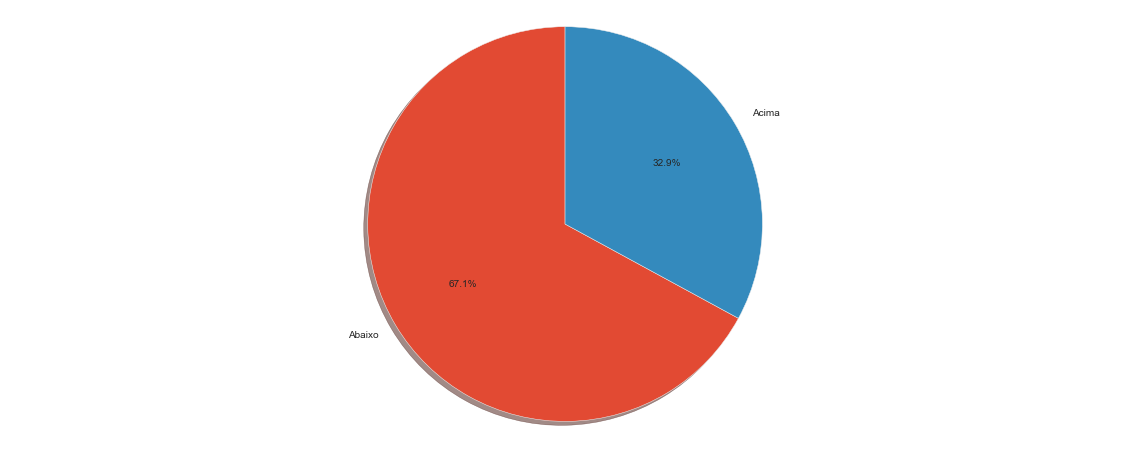

In [29]:
labels = ["Abaixo", "Acima"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

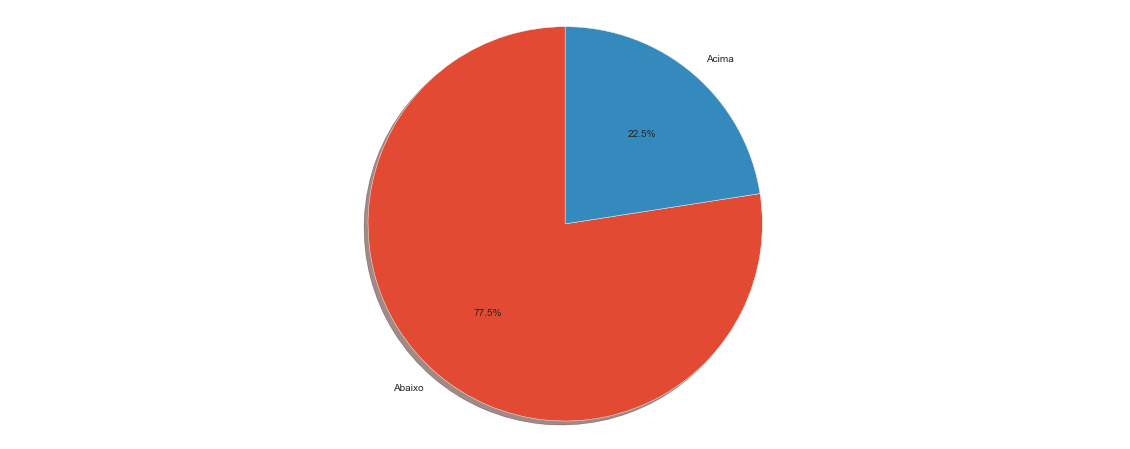

In [30]:
labels = ["Abaixo", "Acima"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


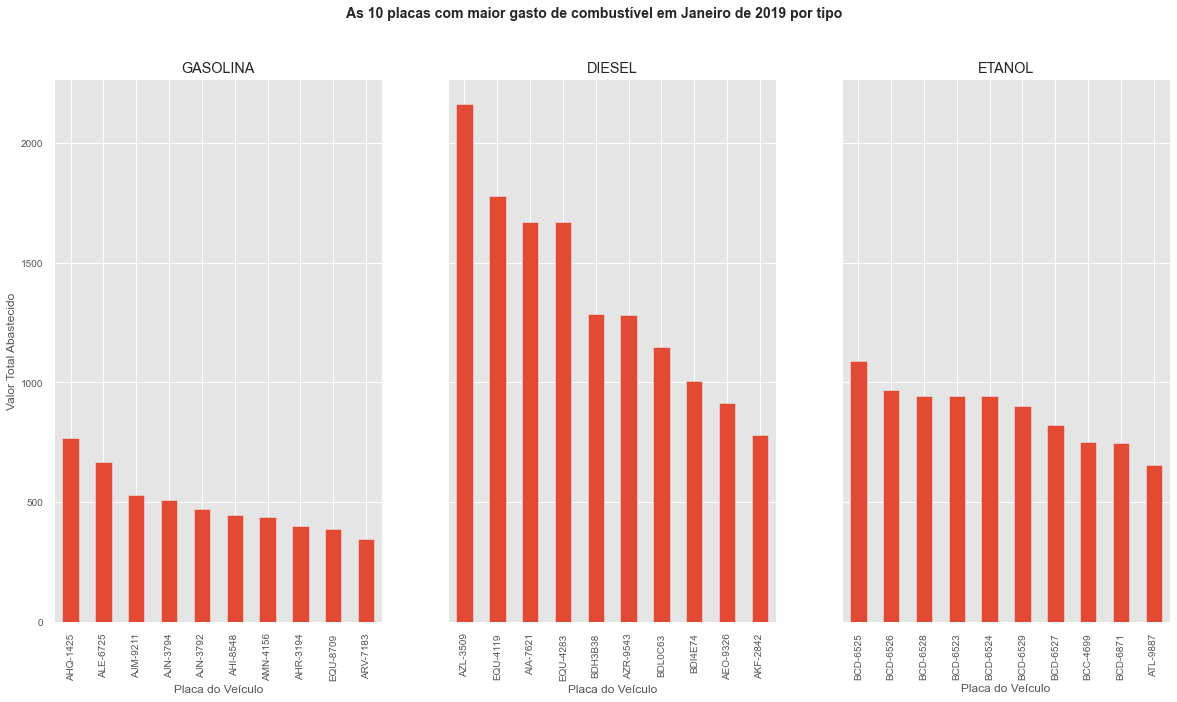

In [31]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]
#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot the data and get the average
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 10))
#plot GASOLINA
top_10_g.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='GASOLINA', xlabel='Placa do Veículo', ylabel='Valor Total Abastecido')
#plot DIESEL
top_10_d.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax1)
ax1.set(title='DIESEL', xlabel='Placa do Veículo', ylabel='')
#plot ETANOL
top_10_e.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax2)
ax2.set(title='ETANOL', xlabel='Placa do Veículo', ylabel='')

#set limits and labels
#ax.set(title='As 10 placas com maior gasto de combustível em Janeiro de 2019 por tipo', xlabel='Placa do Veículo', ylabel='Valor Abastecido Total')
fig.suptitle('As 10 placas com maior gasto de combustível em Janeiro de 2019 por tipo', fontsize=14, fontweight='bold')
    
#hide the legend
ax2.legend().set_visible(False)
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


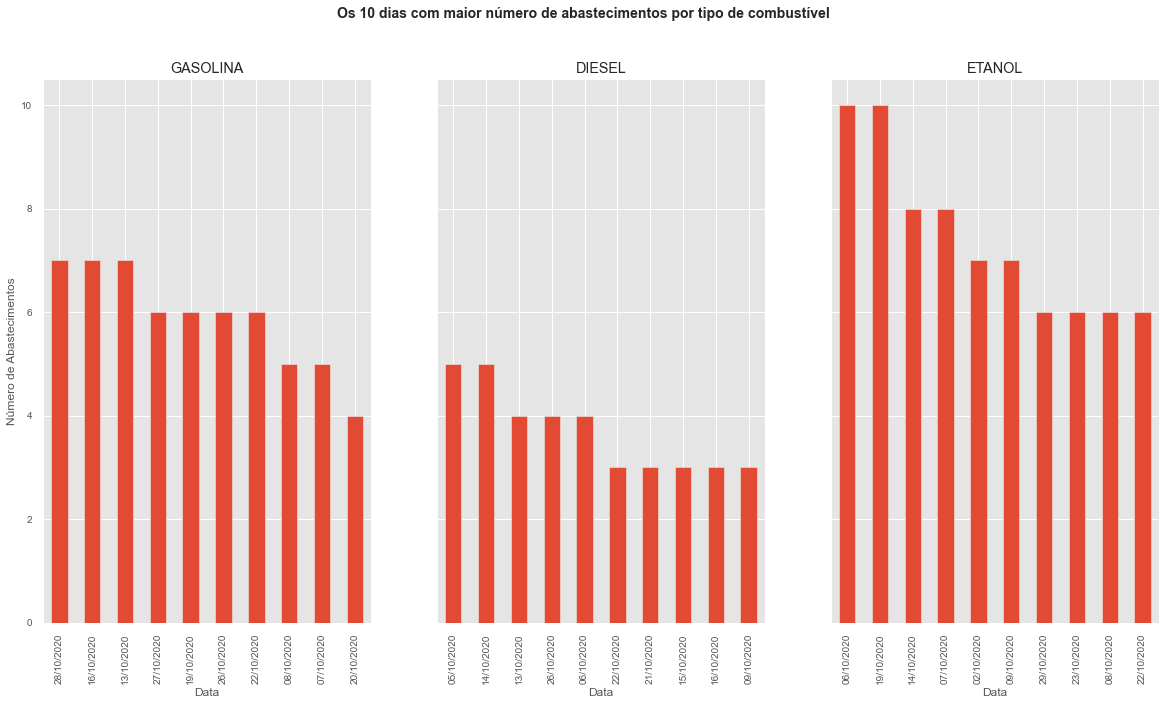

In [32]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]

#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 10))

#plot GASOLINA
top_10_g.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax0)
ax0.set(title="GASOLINA", xlabel='Data', ylabel='Número de Abastecimentos')

#plot DIESEL
top_10_d.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax1)
ax1.set(title="DIESEL", xlabel='Data', ylabel='')

#plot ETANOL
top_10_e.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax2)
ax2.set(title="ETANOL", xlabel='Data', ylabel='')

#set limits and labels
fig.suptitle('Os 10 dias com maior número de abastecimentos por tipo de combustível', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


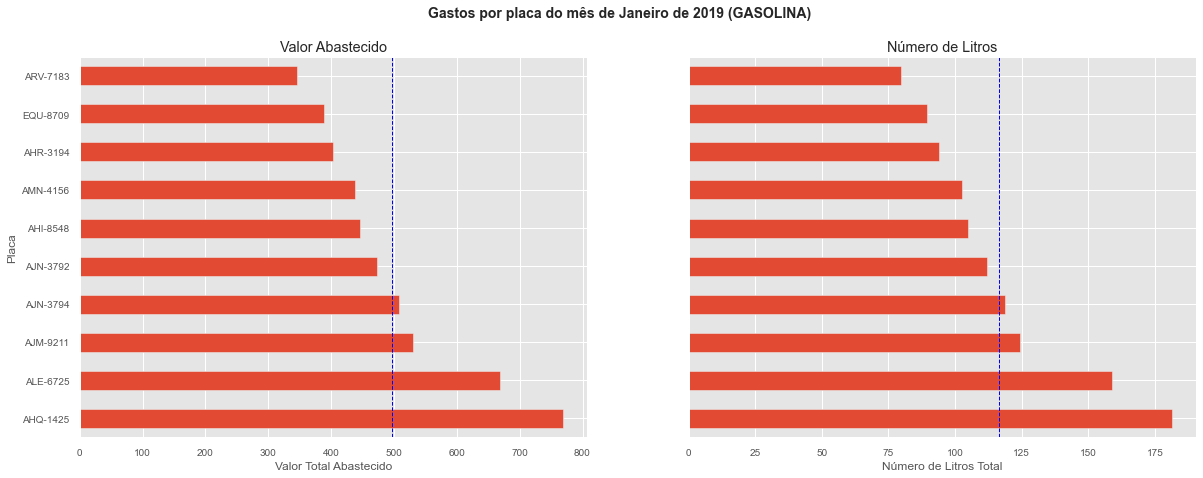

In [33]:
#get the figure and the axes
top_10 = df[df["Produto"] == "GASOLINA"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (GASOLINA)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


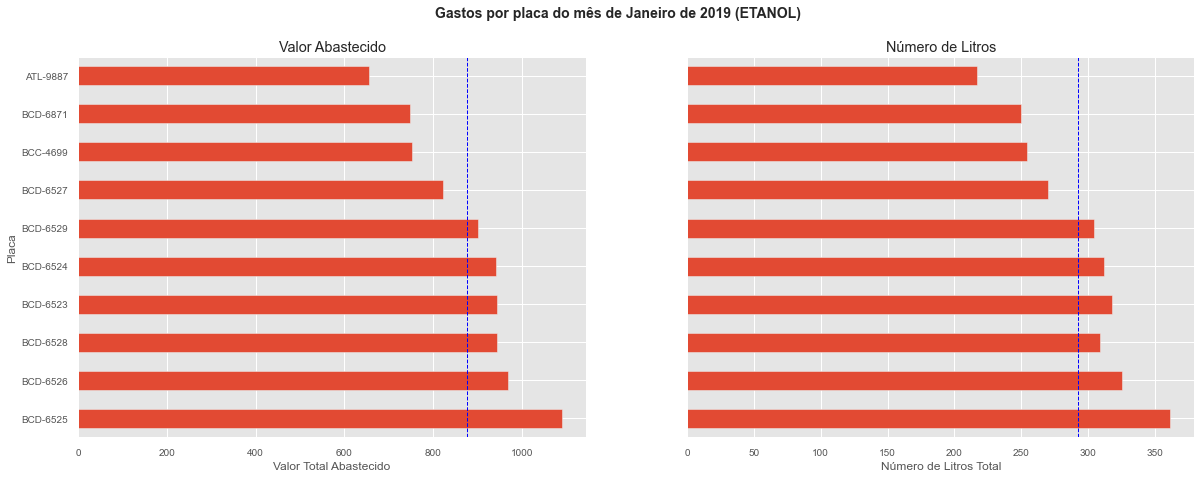

In [34]:
#get the figure and the axes
top_10 = df[df["Produto"] == "ETANOL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (ETANOL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


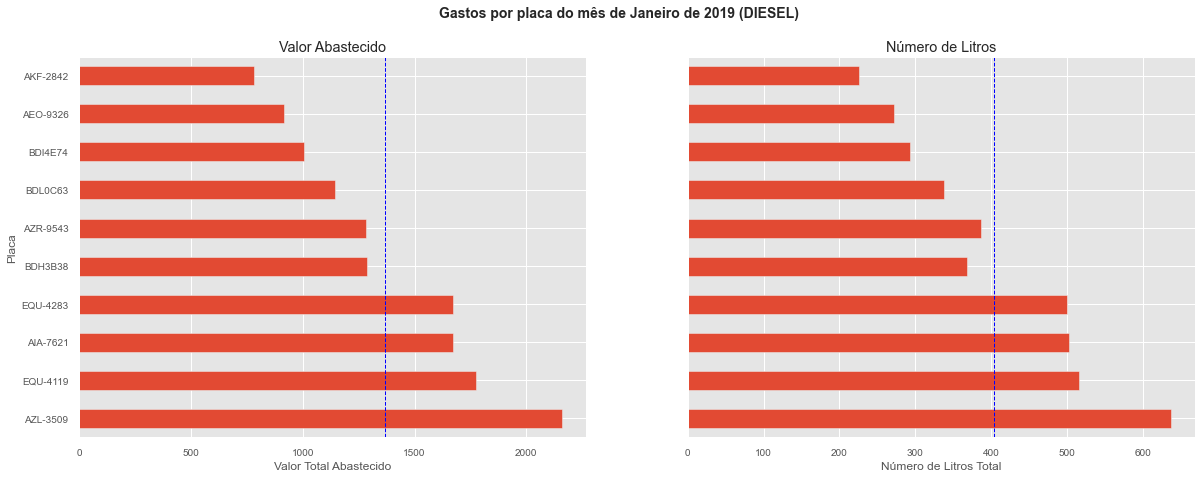

In [35]:
#get the figure and the axes
top_10 = df[df["Produto"] == "DIESEL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (DIESEL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


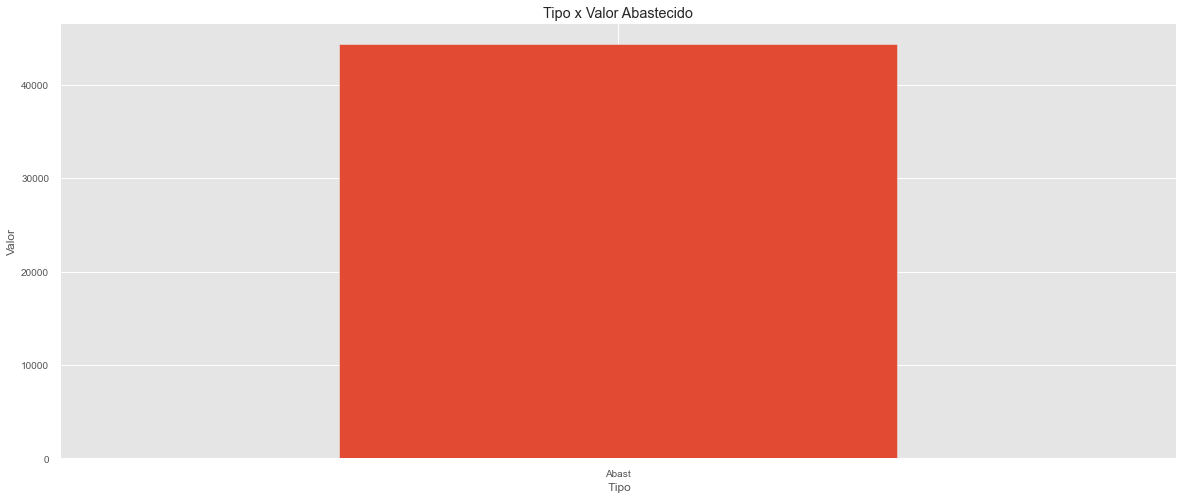

In [36]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Tipo')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Tipo': 'Tipo', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Tipo", rot = 0, ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Tipo x Valor Abastecido', xlabel=' Tipo', ylabel='Valor')

#hide the legend
ax.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


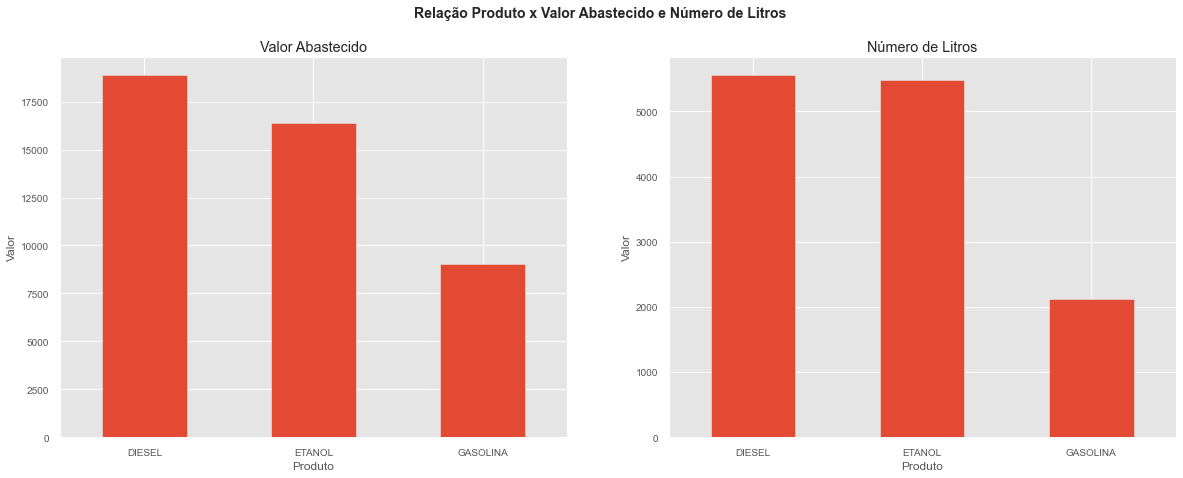

In [37]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


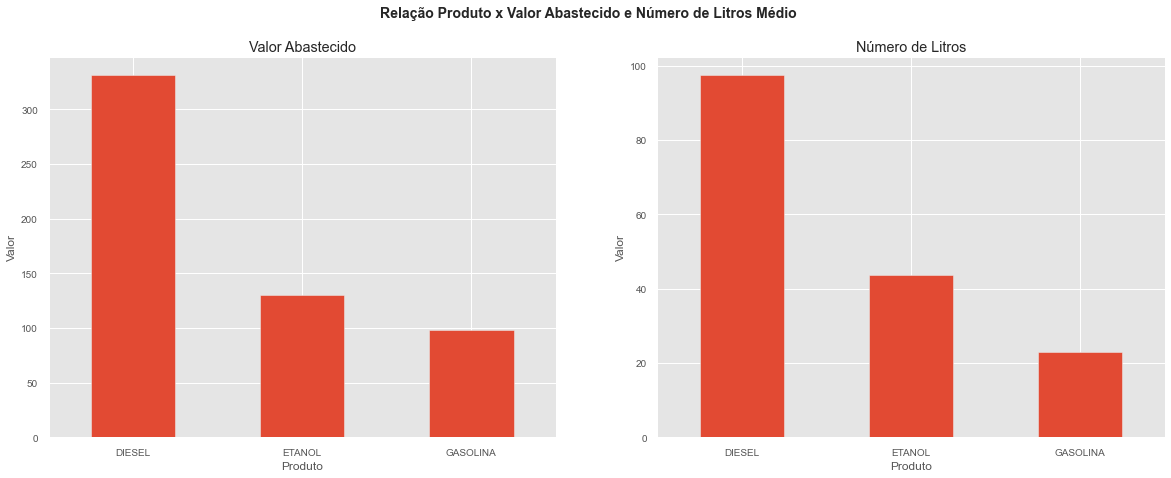

In [38]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'mean', 'Nr Litros': 'mean'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros Médio', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


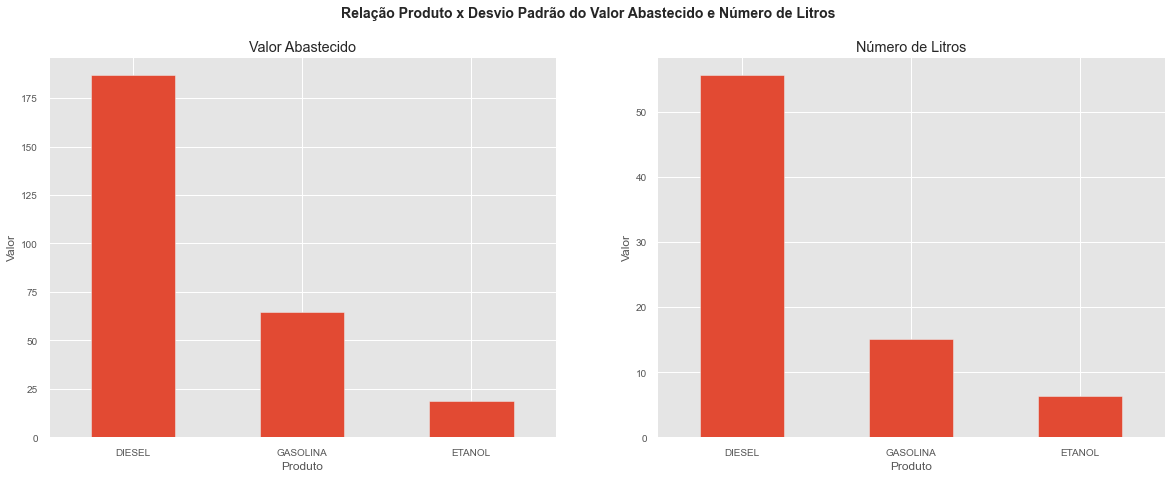

In [39]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'std', 'Nr Litros': 'std'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Desvio Padrão do Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)